In [0]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

import torchvision
import torch
import numpy as np
import scipy.stats
import sklearn.manifold
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn
import pandas as pd
import sklearn
import os
import pickle
import time
from scipy.spatial import distance
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.manifold import TSNE, MDS
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

ROOT_PATH = 'gdrive/My Drive/NI Project - RSA/'
IMAGENET_PATH = ROOT_PATH + 'RSA_on_ImageNet/'

## MDS embedding

In [0]:
#files_only - names of the files containing confusion matrices. First list are top-1 confusion matrices, second list are top-5. Comment unnecessary.
files_only = np.array(['confusion_vgg13_bn.npy', 'confusion_vgg11_bn.npy', 'confusion_alexnet.npy', 'confusion_densenet121.npy', 'confusion_resnet18.npy', 'confusion_resnet34.npy', 'confusion_resnet50.npy', 'confusion_resnext50_32x4d.npy', 
                       'confusion_vgg13.npy', 'confusion_vgg16_bn.npy', 'confusion_vgg16.npy', 'confusion_vgg19_bn.npy', 'confusion_resnet101.npy', 'confusion_squeezenet1_0.npy', 'confusion_squeezenet1_1.npy', 'confusion_mobilenet.npy', 'confusion_googlenet.npy'])

files_only = np.array(['confusion_vgg13_bn_top5.npy', 'confusion_vgg11_bn_top5.npy', 'confusion_alexnet_top5.npy', 'confusion_densenet121_top5.npy', 'confusion_resnet18_top5.npy', 'confusion_resnet34_top5.npy', 'confusion_resnet50_top5.npy', 'confusion_resnext50_32x4d_top5.npy', 
                       'confusion_vgg13_top5.npy', 'confusion_vgg16_bn_top5.npy', 'confusion_vgg16_top5.npy', 'confusion_vgg19_bn_top5.npy', 'confusion_resnet101_top5.npy', 'confusion_squeezenet1_0_top5.npy', 'confusion_squeezenet1_1_top5.npy', 'confusion_mobilenet_top5.npy', 'confusion_googlenet_top5.npy'])

files_pretty_names = np.array(['vgg13_bn', 'vgg11_bn', 'alexnet', 'densenet121', 'resnet18', 'resnet34', 'resnet50', 'resnext50_32x4d', 
                               'vgg13', 'vgg16_bn', 'vgg16', 'vgg19_bn', 'resnet101', 'squeezenet1_0', 'squeezenet1_1', 'mobilenet', 'googlenet'])

In [0]:
acc_only = np.array([28.45, 29.62, 43.45, 25.35, 30.24, 26.70, 23.85, 22.38, 
                     30.07, 26.63, 28.41, 25.76, 22.63, 41.9, 41.81, 28.12, 30.22])

In [0]:
acc_sorted_idx = np.argsort(acc_only)
acc_sorted = acc_only[acc_sorted_idx]
files_sorted = files_only[acc_sorted_idx]
files_pretty_names_sorted = files_pretty_names[acc_sorted_idx]

Transform upper halves of input RDMs into 1D vectors. Bring data to the form expected by embedding algorithms.

In [0]:
n = len(files_only)
dim = int(1000 * 999 / 2)
triu_idx = np.triu_indices(1000, k = 1)

In [0]:
data = np.ones((n, dim)) * -17

In [0]:
for i, f in enumerate(files_sorted):
  cur = np.load(IMAGENET_PATH + f)
  data[i] = cur[triu_idx]

In [0]:
mds = MDS(n_components=2, n_init=100, max_iter=2000, eps=0.0001)
data_embedded = mds.fit_transform(data)

In [0]:
fig, ax = plt.subplots(figsize=(4.5, 4))

sc = plt.scatter(data_embedded[:, 0], data_embedded[:, 1], c=1 - acc_sorted, cmap='rainbow')
# plt.colorbar(sc)

ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax.set_yticklabels([])
ax.set_xticklabels([])

plt.show()

NameError: ignored

## Heatmaps

### Confusion heatmap for the paper

In [0]:
cm = np.load(IMAGENET_PATH + 'confusion_densenet121.npy')

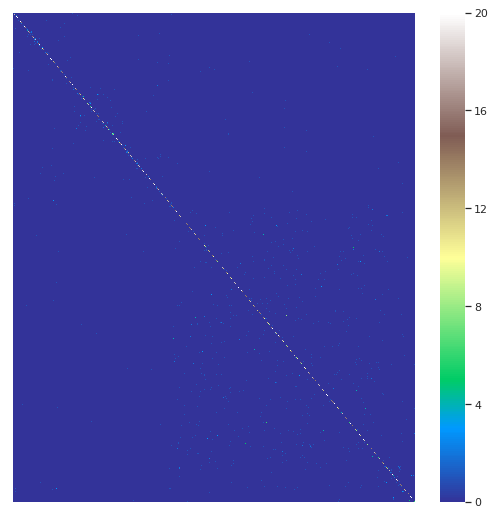

In [0]:
seaborn.set(font_scale=1)
fig, ax = plt.subplots(figsize=(9, 9))
seaborn.heatmap(cm, ax=ax, cmap='terrain')

ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

### correlation distance heatmap for the paper

In [0]:
cm1 = np.load(IMAGENET_PATH + 'activations/corrMatrix_squeezenet1_1_.npy')

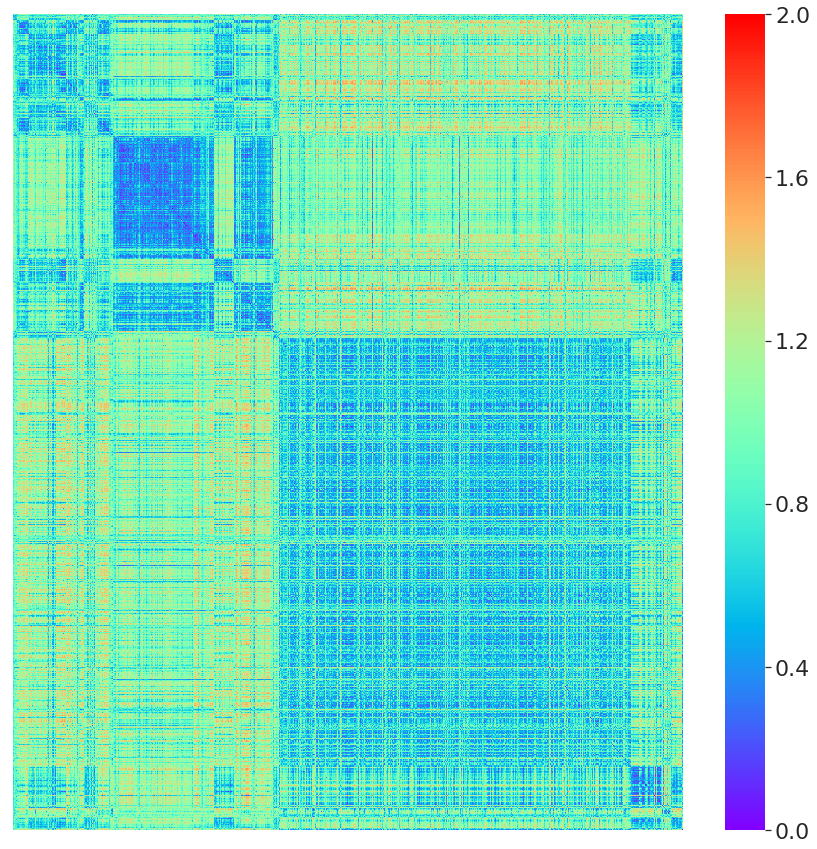

In [0]:
seaborn.set(font_scale=2)
fig, ax = plt.subplots(figsize=(15, 15))
seaborn.heatmap(cm1, ax=ax, cmap='rainbow', vmin=0, vmax=2)

ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()